# Проектная деятельность

Предварительный план:
    1. Исключить коррелированные факторы
    2. Преобразовать факторы необходимым образом
    3. Составить logit-модель
    4. Проверить статистическую значимость модели и параметров
    5. Проверить остатки на гомоскедастичность
    6. (*) Преобразовать с помощью ВМНК
## Импортирую данные


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_excel('pd_data.xlsx', index_col=0, sheet_name='Данные', skiprows=3)
features = {'X1': '1, если совокупные обязательства превышают совокупные активы',
            'X2': '1, если за текущий и предшествующий период прибыль отрицательная',
            'X3': 'Мера изменения чистого дохода за последние два года',
            'X4': 'Проценты к уплате/выручка',
            'X5': 'Выручка/дебиторская задолженность',
            'X6': 'Коэффициент текущей ликвидности',
            'X7': 'Коэффициент финансовой независимости',
            'X8': 'Коэффициент рентабельности внеоборотных активов'}
df.index = [list(range(len(df)))]
df.head()

## Исключение незначимых факторов

In [ ]:
import statsmodels.api as sm
df['intercept'] = 1
data = df.copy()
y_train = data['Y'].to_numpy()
alpha = 0.1
while True:
    x_train = data.drop(['Y'], axis=1).to_numpy()
    model = sm.Logit(y_train, x_train).fit()
    largest_p = max(model.pvalues)
    if largest_p > alpha:
        index = np.argmax(model.pvalues) + 1
        print(f'Dropping column {data.columns[index]} with level of significance {largest_p}')
        data.drop(data.columns[index], axis=1, inplace=True)
    else:
        break

model.summary()

In [92]:
test_result = [round(value) for value in model.predict(x_train)]
correct_pred = sum([1 for i, j in zip(test_result, y_train) if i == j])

print(f'Процент предсказанных Y: {correct_pred / len(df) * 100}%')

Процент предсказанных Y: 85.0%


## Проверка на гетероскедастичность

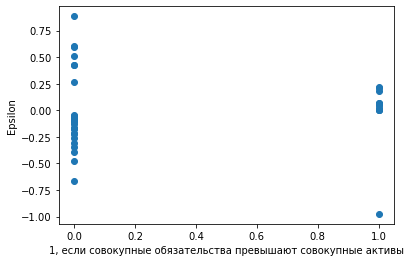

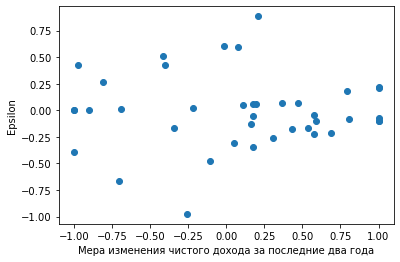

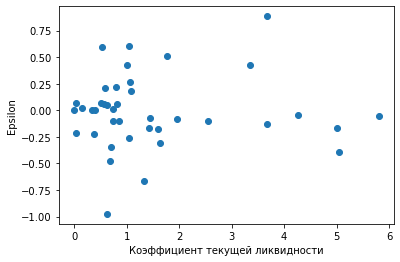

In [96]:
from matplotlib import pylab as plt
import statsmodels.stats.diagnostic as sms 
for column in data.drop('Y', axis=1).columns:
    plt.ylabel('Epsilon')
    plt.xlabel(features[column])
    plt.scatter(data[column], model.resid_generalized)
    plt.show()